In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r4-good.csv')
dfm = pd.read_csv('wat-r4-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,33,34,6,6,1
1,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,11,34,5,6,1
2,186,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,1,10,34,4,6,1
3,187,3,1,0xeae00,3,2,1,4,16,29,13,0,0,168,1,9,34,3,6,1
4,188,3,1,0xeae00,3,3,1,4,16,29,13,0,0,168,1,8,34,2,6,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,61,63,7,7,0
1,117,1,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,59,63,6,7,0
2,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,3,26,63,5,7,0
3,186,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,3,23,63,4,7,0
4,187,3,1,0xeae00,3,2,1,4,16,29,13,0,0,168,3,22,63,3,7,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,33,34,6,6,1
1,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,11,34,5,6,1
2,186,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,1,10,34,4,6,1
3,187,3,1,0xeae00,3,2,1,4,16,29,13,0,0,168,1,9,34,3,6,1
4,188,3,1,0xeae00,3,3,1,4,16,29,13,0,0,168,1,8,34,2,6,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,33,34,6,6,1
22885,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,61,63,7,7,0
22886,117,1,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,59,63,6,7,0
1,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,11,34,5,6,1
22887,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,3,26,63,5,7,0
22888,186,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,3,23,63,4,7,0
2,186,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,1,10,34,4,6,1
22889,187,3,1,0xeae00,3,2,1,4,16,29,13,0,0,168,3,22,63,3,7,0
3,187,3,1,0xeae00,3,2,1,4,16,29,13,0,0,168,1,9,34,3,6,1
4,188,3,1,0xeae00,3,3,1,4,16,29,13,0,0,168,1,8,34,2,6,1


In [12]:
df.to_csv('wat-r4-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r4-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,33,34,6,6,1
1,113,1,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,61,63,7,7,0
2,117,1,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,59,63,6,7,0
3,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,11,34,5,6,1
4,185,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,3,26,63,5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,3251510,3,1,0x4d2c0,3,0,0,4,16,29,13,0,0,3251494,10027,12,27,1,1,1
44922,3251511,3,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,11,27,1,1,1
44923,3251512,3,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,10,27,1,1,1
44924,3251513,3,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,9,27,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.006536,0.023509,0.030915,0.000342,-0.000508,-0.012904,-0.016395,-0.015679,-0.007653,0.008627,0.032115,1.000000,0.982139,-0.044011,-0.093188,-0.417331,-0.505279,0.060195
outport,0.006536,1.000000,-0.800708,0.125804,0.011826,-0.017785,0.672664,0.675450,0.931436,0.902834,-0.910362,-0.776426,0.006537,0.005199,-0.138818,0.284679,-0.105475,-0.101983,0.023009
inport,0.023509,-0.800708,1.000000,-0.144435,-0.033896,0.050976,-0.478686,-0.534234,-0.843397,-0.706526,0.691707,0.780475,0.023507,0.023391,0.060643,-0.246221,0.022473,-0.020471,-0.007629
packet_type,0.030915,0.125804,-0.144435,1.000000,-0.145832,0.219314,-0.463809,-0.483328,0.027689,-0.086908,-0.081194,-0.109889,0.030917,0.033195,0.139871,0.007571,-0.017068,-0.032168,0.001236
flit_id,0.000342,0.011826,-0.033896,-0.145832,1.000000,-0.035751,0.306912,0.304717,0.031626,0.098352,0.006280,0.011987,0.000339,0.000126,-0.151147,-0.007795,-0.019971,0.039211,0.003690
flit_type,-0.000508,-0.017785,0.050976,0.219314,-0.035751,1.000000,-0.461558,-0.458258,-0.047562,-0.147909,-0.009444,-0.018027,-0.000510,-0.000189,0.027618,0.039990,-0.086283,-0.020154,-0.005549
vnet,-0.012904,0.672664,-0.478686,-0.463809,0.306912,-0.461558,1.000000,0.990048,0.729211,0.836201,-0.717268,-0.593222,-0.012904,-0.015034,-0.242595,0.194753,-0.038645,-0.056790,0.019786
vc,-0.016395,0.675450,-0.534234,-0.483328,0.304717,-0.458258,0.990048,1.000000,0.736172,0.823078,-0.701518,-0.603101,-0.016396,-0.018382,-0.236235,0.195766,-0.031174,-0.038953,0.018287
src_ni,-0.015679,0.931436,-0.843397,0.027689,0.031626,-0.047562,0.729211,0.736172,1.000000,0.951370,-0.932425,-0.891265,-0.015678,-0.016857,-0.157773,0.297789,-0.071842,-0.068890,0.017798
src_router,-0.007653,0.902834,-0.706526,-0.086908,0.098352,-0.147909,0.836201,0.823078,0.951370,1.000000,-0.933417,-0.819855,-0.007653,-0.009414,-0.171706,0.294337,-0.073247,-0.092438,0.022384


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,3,0,0,3,2,8,24,8,105,1,6,6
1,1,3,0,0,3,2,8,24,8,105,3,7,7
2,1,3,0,0,3,2,9,24,8,105,2,6,7
3,3,1,3,0,0,4,16,0,0,168,1,5,6
4,3,1,3,0,0,4,16,0,0,168,3,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,3,1,3,0,0,4,16,0,0,3251494,10027,1,1
44922,3,1,3,1,1,4,16,0,0,3251494,10027,1,1
44923,3,1,3,2,1,4,16,0,0,3251494,10027,1,1
44924,3,1,3,3,1,4,16,0,0,3251494,10027,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000,0.857143,0.666667,0.000000,0.000000,0.277778,0.277778
1,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.000,0.857143,0.666667,0.000000,0.000194,0.333333,0.333333
2,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.125,0.857143,0.666667,0.000000,0.000097,0.277778,0.333333
3,1.000000,0.333333,0.5,0.00,0.000000,1.0,1.000,0.000000,0.000000,0.000019,0.000000,0.222222,0.277778
4,1.000000,0.333333,0.5,0.00,0.000000,1.0,1.000,0.000000,0.000000,0.000019,0.000194,0.222222,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,1.000000,0.333333,0.5,0.00,0.000000,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
44922,1.000000,0.333333,0.5,0.25,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
44923,1.000000,0.333333,0.5,0.50,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
44924,1.000000,0.333333,0.5,0.75,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.800708,0.125804,0.011826,-0.017785,0.672664,0.675450,-0.910362,-0.776426,0.006537,0.005199,-0.105475,-0.101983,0.023009
1,-0.800708,1.000000,-0.144435,-0.033896,0.050976,-0.478686,-0.534234,0.691707,0.780475,0.023507,0.023391,0.022473,-0.020471,-0.007629
2,0.125804,-0.144435,1.000000,-0.145832,0.219314,-0.463809,-0.483328,-0.081194,-0.109889,0.030917,0.033195,-0.017068,-0.032168,0.001236
3,0.011826,-0.033896,-0.145832,1.000000,-0.035751,0.306912,0.304717,0.006280,0.011987,0.000339,0.000126,-0.019971,0.039211,0.003690
4,-0.017785,0.050976,0.219314,-0.035751,1.000000,-0.461558,-0.458258,-0.009444,-0.018027,-0.000510,-0.000189,-0.086283,-0.020154,-0.005549
5,0.672664,-0.478686,-0.463809,0.306912,-0.461558,1.000000,0.990048,-0.717268,-0.593222,-0.012904,-0.015034,-0.038645,-0.056790,0.019786
6,0.675450,-0.534234,-0.483328,0.304717,-0.458258,0.990048,1.000000,-0.701518,-0.603101,-0.016396,-0.018382,-0.031174,-0.038953,0.018287
7,-0.910362,0.691707,-0.081194,0.006280,-0.009444,-0.717268,-0.701518,1.000000,0.911150,0.008625,0.009779,0.078618,0.095121,-0.020025
8,-0.776426,0.780475,-0.109889,0.011987,-0.018027,-0.593222,-0.603101,0.911150,1.000000,0.032113,0.032477,0.022420,0.026148,-0.009677
9,0.006537,0.023507,0.030917,0.000339,-0.000510,-0.012904,-0.016396,0.008625,0.032113,1.000000,0.982139,-0.417331,-0.505280,0.060195


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        1
1        0
2        0
3        1
4        0
        ..
44921    1
44922    1
44923    1
44924    1
44925    1
Name: target, Length: 44926, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.28146656, -0.21533756,  0.81684088, -0.15595573,  0.76010145,
         0.30605499],
       [ 1.28211358, -0.21681317,  0.82895957, -0.15614843,  0.75629845,
         0.31343842],
       [ 1.21585559, -0.24931876,  0.82400295, -0.16412342,  0.77463409,
         0.32750551],
       ...,
       [-0.7780186 , -0.10879405, -0.64403276, -0.02057547,  0.02420389,
         0.01361905],
       [-0.80331322, -0.21102667, -0.64802185,  0.18971988, -0.04117598,
        -0.00496492],
       [-0.78587981, -0.17995701, -0.64734661,  0.56960205,  0.10863983,
         0.02474571]])

In [24]:
pca.explained_variance_ratio_

array([0.52158659, 0.1557815 , 0.13534069, 0.08716233, 0.04541999,
       0.0244169 ])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

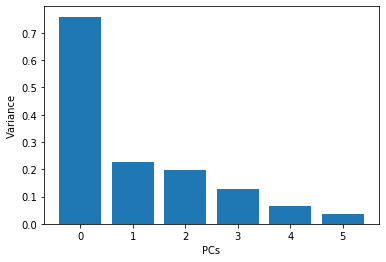

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,1.281467,-0.215338,0.816841,-0.155956,0.760101,0.306055
1,1.282114,-0.216813,0.828960,-0.156148,0.756298,0.313438
2,1.215856,-0.249319,0.824003,-0.164123,0.774634,0.327506
3,-0.781460,-0.071160,0.788361,-0.605775,-0.077053,-0.019918
4,-0.781038,-0.072040,0.796378,-0.605257,-0.079388,-0.014124
...,...,...,...,...,...,...
44921,-0.770157,-0.037631,-0.640719,-0.610753,-0.060232,0.002492
44922,-0.752724,-0.006561,-0.640044,-0.230871,0.089584,0.032203
44923,-0.778019,-0.108794,-0.644033,-0.020575,0.024204,0.013619
44924,-0.803313,-0.211027,-0.648022,0.189720,-0.041176,-0.004965


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,1.281467,-0.215338,0.816841,-0.155956,0.760101,0.306055,1
1,1.282114,-0.216813,0.828960,-0.156148,0.756298,0.313438,0
2,1.215856,-0.249319,0.824003,-0.164123,0.774634,0.327506,0
3,-0.781460,-0.071160,0.788361,-0.605775,-0.077053,-0.019918,1
4,-0.781038,-0.072040,0.796378,-0.605257,-0.079388,-0.014124,0
...,...,...,...,...,...,...,...
44921,-0.770157,-0.037631,-0.640719,-0.610753,-0.060232,0.002492,1
44922,-0.752724,-0.006561,-0.640044,-0.230871,0.089584,0.032203,1
44923,-0.778019,-0.108794,-0.644033,-0.020575,0.024204,0.013619,1
44924,-0.803313,-0.211027,-0.648022,0.189720,-0.041176,-0.004965,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-2.130253e-15,7.033655e-17,-1.293426e-15,-4.923774e-15,2.217216e-14,-0.019944
1,-2.130253e-15,1.000000e+00,-1.405412e-16,-1.944091e-15,2.318862e-15,-1.128507e-14,0.002006
2,7.033655e-17,-1.405412e-16,1.000000e+00,-8.004689e-16,-3.061674e-16,1.086351e-15,-0.016174
3,-1.293426e-15,-1.944091e-15,-8.004689e-16,1.000000e+00,-2.335670e-15,-1.634003e-15,-0.000321
4,-4.923774e-15,2.318862e-15,-3.061674e-16,-2.335670e-15,1.000000e+00,-2.316155e-16,0.003883
5,2.217216e-14,-1.128507e-14,1.086351e-15,-1.634003e-15,-2.316155e-16,1.000000e+00,-0.018946
target,-1.994444e-02,2.005778e-03,-1.617442e-02,-3.206538e-04,3.882957e-03,-1.894602e-02,1.000000


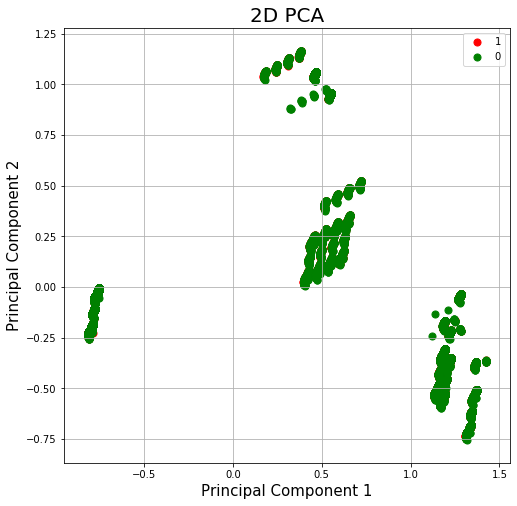

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,3,0,0,3,2,8,0,0,24,8,105,1,33,34,6,6,1
1,1,3,0,0,3,2,8,0,0,24,8,105,3,61,63,7,7,0
2,1,3,0,0,3,2,9,1,1,24,8,105,2,59,63,6,7,0
3,3,1,3,0,0,4,16,29,13,0,0,168,1,11,34,5,6,1
4,3,1,3,0,0,4,16,29,13,0,0,168,3,26,63,5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,3,1,3,0,0,4,16,29,13,0,0,3251494,10027,12,27,1,1,1
44922,3,1,3,1,1,4,16,29,13,0,0,3251494,10027,11,27,1,1,1
44923,3,1,3,2,1,4,16,29,13,0,0,3251494,10027,10,27,1,1,1
44924,3,1,3,3,1,4,16,29,13,0,0,3251494,10027,9,27,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 18329 samples, validate on 12220 samples
Epoch 1/50
18329/18329 [==============================] - 3s 149us/step - loss: 0.2499 - accuracy: 0.5114 - val_loss: 0.2497 - val_accuracy: 0.5233
Epoch 2/50
18329/18329 [==============================] - 2s 98us/step - loss: 0.2496 - accuracy: 0.5181 - val_loss: 0.2494 - val_accuracy: 0.5256
Epoch 3/50
18329/18329 [==============================] - 2s 96us/step - loss: 0.2494 - accuracy: 0.5199 - val_loss: 0.2493 - val_accuracy: 0.5260
Epoch 4/50
18329/18329 [==============================] - 2s 93us/step - loss: 0.2493 - accuracy: 0.5209 - val_loss: 0.2491 - val_accuracy: 0.5260
Epoch 5/50
18329/18329 [==============================] - 2s 95us/step - loss: 0.2492 - accuracy: 0.5190 - val_loss: 0.2490 - val_accuracy: 0.5256
Epoch 6/50
18329/18329 [==============================] - 2s 93us/step - loss: 0.2491 - accuracy: 0.5179 - val_loss: 0.2488 - val_accuracy: 0.5260
Epoch 7/50
18329/18329 [==============================] - 2s 93us/s

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [42]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.49%


In [43]:
dff = pd.read_csv('wat-r4-pkt.csv',nrows=500)

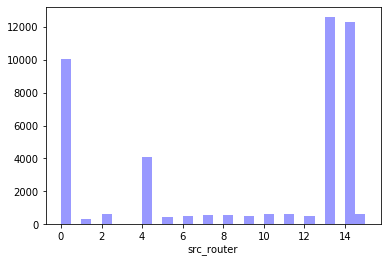

In [44]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

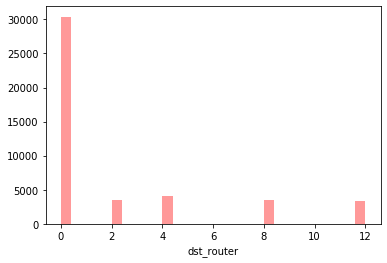

In [45]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

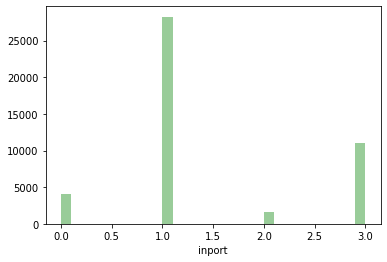

In [46]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

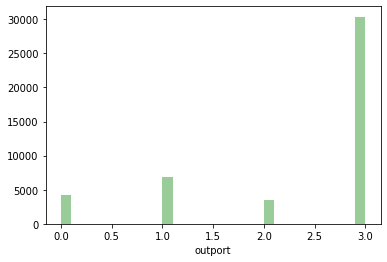

In [47]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

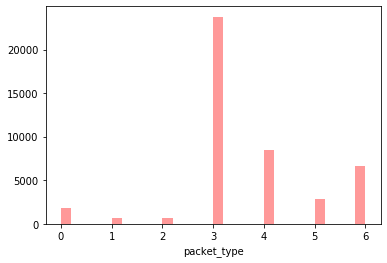

In [48]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')